In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data.shape

(60000, 28, 28)

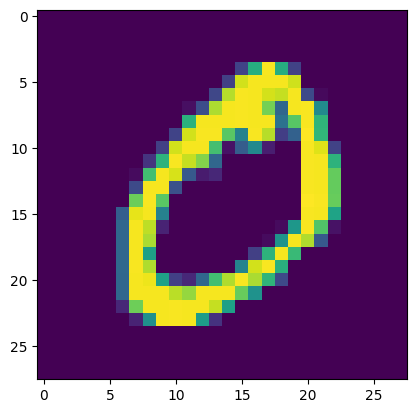

In [6]:
plt.imshow(train_data[1])

In [7]:
train_labels[1]

0

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Antes de hacer el entrenamiento, se debe modificar la data de entrada.
##### Se lleva de 3 dimensiones a 2 dimensiones, y ademas se normaliza

In [25]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32') / 255

In [26]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
train_labels[0]

5

In [28]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.9536e-04 - accuracy: 1.0000
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.6420e-04 - accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 2.3939e-04 - accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1777e-04 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 2.0173e-04 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 1.8905e-04 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 1.7660e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 1.6651e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 1.5697e-04 - accuracy: 1.0000
Epoch 10/10
469/469 [==============================] - 2s 5ms/st

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9841


[0.07388552278280258, 0.9840999841690063]